In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math

### Load dataframe

In [3]:
df_emp_access = pd.read_csv('data/train.csv')
df_emp_access.head(10)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [4]:
attnames = df_emp_access.columns[2:]
num_requesters = len(np.unique(df_emp_access[attnames].values))
num_requested_res = len(df_emp_access['RESOURCE'].unique())


print('---Description---')
print('Num requesters:', num_requesters)
print('Num requested resources:', num_requested_res)
print('Num entries:', df_emp_access.shape[0])
print()

for attname in attnames:
    print(attname, '-->', len(df_emp_access[attname].unique()))
print()

df_pos_entries = df_emp_access[df_emp_access['ACTION']==1]
df_neg_entries = df_emp_access[df_emp_access['ACTION']==0]
print('Num pos entries:', df_pos_entries.shape[0])
print('Num neg entries:', df_neg_entries.shape[0])

---Description---
Num requesters: 8050
Num requested resources: 7518
Num entries: 32769

MGR_ID --> 4243
ROLE_ROLLUP_1 --> 128
ROLE_ROLLUP_2 --> 177
ROLE_DEPTNAME --> 449
ROLE_TITLE --> 343
ROLE_FAMILY_DESC --> 2358
ROLE_FAMILY --> 67
ROLE_CODE --> 343

Num pos entries: 30872
Num neg entries: 1897


### Attribute analysis

In [7]:
attname = 'MGR_ID'
col_list = df_emp_access[attname].tolist()
attval_to_freq1 = dict(Counter(col_list))

attname = 'ROLE_ROLLUP_1'
col_list = df_emp_access[attname].tolist()
attval_to_freq2 = dict(Counter(col_list))

attname = 'ROLE_ROLLUP_2'
col_list = df_emp_access[attname].tolist()
attval_to_freq3 = dict(Counter(col_list))

attname = 'ROLE_DEPTNAME'
col_list = df_emp_access[attname].tolist()
attval_to_freq4 = dict(Counter(col_list))

attname = 'ROLE_TITLE'
col_list = df_emp_access[attname].tolist()
attval_to_freq5 = dict(Counter(col_list))

attname = 'ROLE_FAMILY_DESC'
col_list = df_emp_access[attname].tolist()
attval_to_freq6 = dict(Counter(col_list))

attname = 'ROLE_FAMILY'
col_list = df_emp_access[attname].tolist()
attval_to_freq7 = dict(Counter(col_list))

attname = 'ROLE_CODE'
col_list = df_emp_access[attname].tolist()
attval_to_freq8 = dict(Counter(col_list))

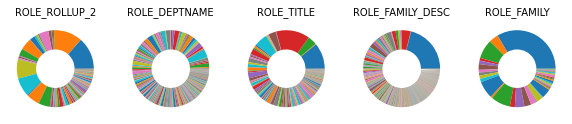

In [9]:
fig, axes = plt.subplots(1, 5)

fig.set_figheight(10)
fig.set_figwidth(10)


attname = 'ROLE_ROLLUP_2'
axes[0].pie(attval_to_freq3.values(),wedgeprops=dict(width=.5))
axes[0].set_title(attname,fontsize=10)

attname = 'ROLE_DEPTNAME'
axes[1].pie(attval_to_freq4.values(),wedgeprops=dict(width=.5))
axes[1].set_title(attname,fontsize=10)

attname = 'ROLE_TITLE'
axes[2].pie(attval_to_freq5.values(),wedgeprops=dict(width=.5))
axes[2].set_title(attname,fontsize=10)

attname = 'ROLE_FAMILY_DESC'
axes[3].pie(attval_to_freq6.values(),wedgeprops=dict(width=.5))
axes[3].set_title(attname,fontsize=10)

attname = 'ROLE_FAMILY'
axes[4].pie(attval_to_freq7.values(),wedgeprops=dict(width=.5))
axes[4].set_title(attname,fontsize=10)

plt.show()


In [10]:
fig.savefig("figures/ch4_azkag_atts.pdf", format="pdf", bbox_inches="tight")

### Check contradictions in entries

In [11]:
#Pieces of code copied from acgraph.py

attnames_list = list(df_emp_access.columns)[2:]

#---Group by the column header: attvalues, residx, resolution---
dfgb_temp = df_emp_access.groupby(attnames_list + ['RESOURCE','ACTION'])
#convert DataFrameGroupBy to df (I dont know how it works, but it uses a count field)
df_temp = dfgb_temp.size().to_frame(name = 'count').reset_index()
#check the file if needed
#df_temp.to_csv('temp_header.csv') #22 02 14 All the counts must be equal to 1
#drop count column
df_temp = df_temp.drop('count', axis=1)

#---Add user indexes---
dfgb_temp = df_temp.groupby(attnames_list)

dfs_list = []
usridx = 0
for _,df in dfgb_temp:
    k = df.shape[0]
    df.insert(loc=0, column='USR_ID', value=[usridx for _ in range(k)])
    dfs_list.append(df)
    usridx += 1
df_temp = pd.concat(dfs_list)

In [12]:
#Pieces of code copied from acgraph.py

df_entries = df_temp[['USR_ID', 'RESOURCE', 'ACTION']]

df_pos_entries = df_entries[df_entries['ACTION']==1]
df_neg_entries = df_entries[df_entries['ACTION']==0]

dfgb_pos = df_pos_entries.groupby(['USR_ID','RESOURCE'])
df_temp_pos = dfgb_pos.size().to_frame(name = 'COUNT').reset_index()
usrid_to_resid_pos = df_temp_pos[['USR_ID','RESOURCE']].values.tolist()

dfgb_neg = df_neg_entries.groupby(['USR_ID','RESOURCE'])
df_temp_neg = dfgb_neg.size().to_frame(name = 'COUNT').reset_index()
usrid_to_resid_neg = df_temp_neg[['USR_ID','RESOURCE']].values.tolist()

In [13]:
#Change format to set of tuples
usrid_to_resid_pos_set = [(l[0],l[1]) for l in usrid_to_resid_pos]
usrid_to_resid_pos_set = set(usrid_to_resid_pos_set)
print('AZKAG has', len(usrid_to_resid_pos_set), 'pos u-r pairs')

usrid_to_resid_neg_set = [(l[0],l[1]) for l in usrid_to_resid_neg]
usrid_to_resid_neg_set = set(usrid_to_resid_neg_set)
print('AZKAG has', len(usrid_to_resid_neg_set), 'neg u-r pairs')

AZKAG has 30872 pos u-r pairs
AZKAG has 1897 neg u-r pairs


In [14]:
count = 0
for tup in list(usrid_to_resid_pos_set):
    if tup in usrid_to_resid_neg_set:
        count += 1
        
print('AZKAG has', count, 'contradictions')

AZKAG has 0 contradictions
